In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [43]:
diabetes = load_diabetes()

df_diabetes = pd.DataFrame(
    diabetes.data,
    columns=diabetes.feature_names
)

df_diabetes["target"] = diabetes.target


In [44]:
X = df_diabetes[["bmi"]].values
y = df_diabetes["target"].values


In [45]:
X_train = X[:-20]
X_test  = X[-20:]
y_train = y[:-20]
y_test  = y[-20:]


In [46]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

print("Coefficients:\n", regressor.coef_)
print("Independent term:\n", regressor.intercept_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))


Coefficients:
 [938.23786125]
Independent term:
 152.91886182616113
Mean squared error: 2548.07
Coefficient of determination: 0.47


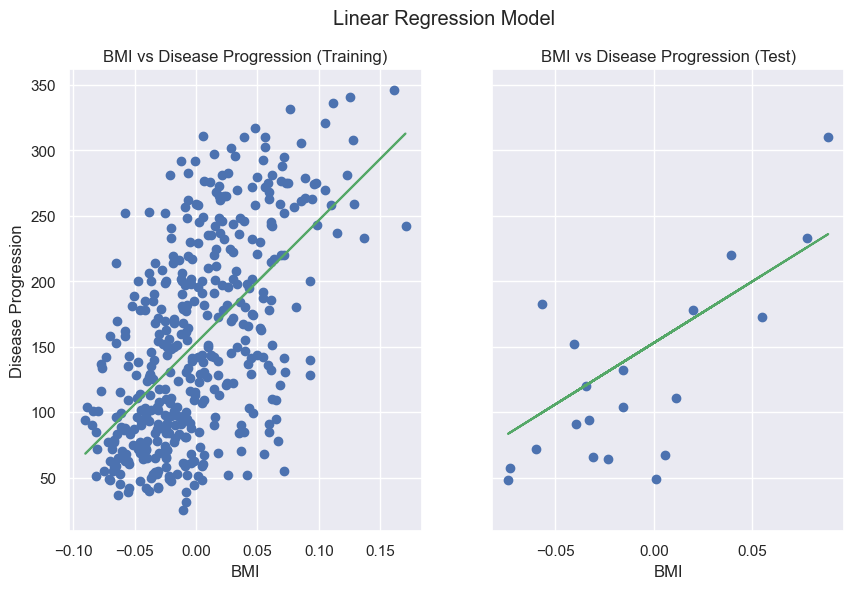

In [49]:
sns.set_theme()

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Training
ax[0].scatter(X_train, y_train)
ax[0].plot(X_train, y_pred_train, c="g")
ax[0].set_title("BMI vs Disease Progression (Training)")
ax[0].set_xlabel("BMI")
ax[0].set_ylabel("Disease Progression")

# Test
ax[1].scatter(X_test, y_test)
ax[1].plot(X_test, y_pred_test, c="g")
ax[1].set_title("BMI vs Disease Progression (Test)")
ax[1].set_xlabel("BMI")

plt.suptitle("Linear Regression Model")
plt.show()
